# California's housing price prediction

Using different Machine Learning models.

In [1]:
import os

In [2]:
DATA_PATH = os.path.join(os.getcwd(), 'data/housing.csv')

In [3]:
import pandas as pd

### Understanding the data

In [4]:
housing = pd.read_csv(DATA_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* `total_bedrooms` has 7 null values
* `ocean_proximity` is `object` type ==> needs to be One Hot Encoded

In [6]:
housing.shape

(20640, 10)

20640 instances of 10 features

In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

`ocean_proximity` is a categorical feature

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Visualizing the data

In [9]:
import matplotlib.pyplot as plt

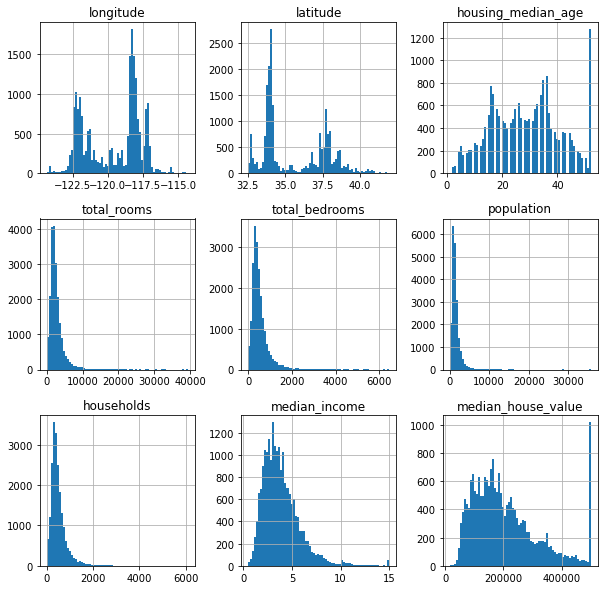

In [10]:
housing.hist(bins=70, figsize=(10, 10))
plt.show()

In [11]:
housing['housing_median_age'].value_counts()

52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: housing_median_age, dtype: int64

In [12]:
housing['housing_median_age'].mean()

28.639486434108527

In [13]:
housing['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

In [14]:
housing['median_house_value'].mean()

206855.81690891474

## Notes 

* `median_income` is scaled to a factor between 1 and 15
* `housing_median_age` is condensed to *52* when older than 52 years
* `median_house_value` is condensed to *500k* for values above 500k

### Visualizing geographical data

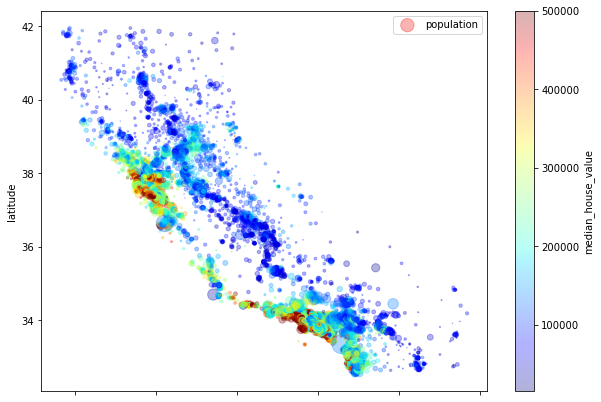

In [15]:
housing.plot(kind='scatter', 
             x='longitude',
             y='latitude', 
             alpha=3e-1,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True
            )
plt.legend()

**Location and population density influences in the house value**

### Searching correlations

In [16]:
# Correlation coefficent (Pearson correlation coefficient (r))
correlation_matrix = housing.corr()

In [17]:
# How much each feature correlates to median house value
correlation_matrix['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

> near +1 = max. positive correlation ==> `median_income`

> near -1 = max. negative correlation ==> --/--

> 0 = uncorrelated ==> `latitude`, `longitude`, `population`


### Note - `Pearson correlation coefficient` only catches linear correlations! 

, cam## Separating train and test sets

## Feature engineering

In [18]:
# creating: rooms_per_holsehold, bedrooms_per_room, population_per_household
housing['population_per_household'] = housing['population']/housing['households']
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']

In [19]:
# Checking correlation again
correlation_matrix = housing.corr()
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

* `rooms_per_holsehold` is more correlated to the price than just `total_rooms`
* `bedrooms_per_room` is more correlated (negatively) to the price than just the number of `total_bedrooms`

In [20]:
housing.head().shape

(5, 13)

# Filling missing values

In [21]:
import numpy as np

In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  population_per_household  20640 non-null  float64
 11  rooms_per_household       20640 non-null  float64
 12  bedrooms_per_room         20433 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [23]:
# total_bedrooms and bedrooms_per_room has 7 missing values
# filling it by mean

mean_1 = housing['total_bedrooms'].mean()
housing['total_bedrooms'].fillna(mean_1, inplace=True)

mean_2 = housing['bedrooms_per_room'].mean()
housing['bedrooms_per_room'].fillna(mean_2, inplace=True)

In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  population_per_household  20640 non-null  float64
 11  rooms_per_household       20640 non-null  float64
 12  bedrooms_per_room         20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [25]:
# One Hot Encoding
housing_cat = housing[['ocean_proximity']] 

In [26]:
housing_cat.shape

(20640, 1)

In [27]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_household,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.802260,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.547945,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.181467,6.281853,0.172096


In [28]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

feature_array = cat_encoder.fit_transform(housing_cat).toarray()
feature_array

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [29]:
one_hot_labels = cat_encoder.categories_

In [30]:
ocean_proximity = pd.DataFrame(feature_array, columns=one_hot_labels)
ocean_proximity

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [31]:
ocean_proximity[16700:16707]

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16700,1.0,0.0,0.0,0.0,0.0
16701,1.0,0.0,0.0,0.0,0.0
16702,1.0,0.0,0.0,0.0,0.0
16703,1.0,0.0,0.0,0.0,0.0
16704,1.0,0.0,0.0,0.0,0.0
16705,1.0,0.0,0.0,0.0,0.0
16706,1.0,0.0,0.0,0.0,0.0


In [32]:
housing.iloc[16700:16707]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_household,rooms_per_household,bedrooms_per_room
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536,143600.0,<1H OCEAN,3.403716,4.728041,0.227581
16701,-120.60,35.10,16.0,3290.0,686.0,1497.0,655.0,2.6875,178200.0,<1H OCEAN,2.285496,5.022901,0.208511
16702,-120.58,35.00,37.0,523.0,119.0,374.0,95.0,1.4726,106300.0,<1H OCEAN,3.936842,5.505263,0.227533
16703,-120.61,35.06,13.0,2364.0,421.0,1257.0,380.0,4.6167,273100.0,<1H OCEAN,3.307895,6.221053,0.178088
16704,-120.56,35.07,14.0,6788.0,1216.0,2866.0,1036.0,3.3603,280200.0,<1H OCEAN,2.766409,6.552124,0.179140
16705,-120.52,35.06,11.0,1317.0,234.0,655.0,243.0,4.3611,329700.0,<1H OCEAN,2.695473,5.419753,0.177677
16706,-120.30,35.10,16.0,2819.0,479.0,1068.0,365.0,4.5461,270800.0,<1H OCEAN,2.926027,7.723288,0.169918


In [33]:
housing_data = pd.concat([housing, ocean_proximity], axis=1)
housing_data = housing_data.drop(['ocean_proximity'], axis=1)

In [34]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,population_per_household,rooms_per_household,bedrooms_per_room,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2.555556,6.984127,0.146591,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2.109842,6.238137,0.155797,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2.802260,8.288136,0.129516,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2.547945,5.817352,0.184458,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2.181467,6.281853,0.172096,0.0,0.0,0.0,1.0,0.0


In [35]:
housing_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,population_per_household,rooms_per_household,bedrooms_per_room,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2.560606,5.045455,0.224625,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,3.122807,6.114035,0.215208,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2.325635,5.205543,0.215173,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2.123209,5.329513,0.219892,0.0,1.0,0.0,0.0,0.0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,2.616981,5.254717,0.221185,0.0,1.0,0.0,0.0,0.0


In [36]:
housing_data.shape

(20640, 17)

In [37]:
housing_targets = housing_data['median_house_value']

In [38]:
housing_features = housing_data.drop(['median_house_value'], axis=1)
housing_features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,population_per_household,rooms_per_household,bedrooms_per_room,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,2.555556,6.984127,0.146591,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,2.109842,6.238137,0.155797,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,2.802260,8.288136,0.129516,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,2.547945,5.817352,0.184458,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,2.181467,6.281853,0.172096,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,2.560606,5.045455,0.224625,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,3.122807,6.114035,0.215208,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,2.325635,5.205543,0.215173,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,2.123209,5.329513,0.219892,0.0,1.0,0.0,0.0,0.0


## Scaling the features

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()
housing_data_scaled = scaler.fit_transform(housing_features)

In [41]:
housing_data_scaled, housing_data_scaled.shape

(array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.        , 1.        ,
         0.        ],
        [0.21215139, 0.565356  , 0.39215686, ..., 0.        , 1.        ,
         0.        ],
        [0.21015936, 0.5642933 , 1.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.31175299, 0.73219979, 0.31372549, ..., 0.        , 0.        ,
         0.        ],
        [0.30179283, 0.73219979, 0.33333333, ..., 0.        , 0.        ,
         0.        ],
        [0.30976096, 0.72582359, 0.29411765, ..., 0.        , 0.        ,
         0.        ]]),
 (20640, 16))

In [42]:
housing_targets

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

## Split train and test sets


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing_data_scaled,
                                                   housing_targets,
                                                   test_size=0.2,
                                                   random_state=42)

In [44]:
len(X_train) + len(X_test) == len(housing_features)

True

In [45]:
len(y_train) + len(y_test) == len(housing_targets)

True

In [46]:
X_train

array([[0.72908367, 0.01806589, 0.62745098, ..., 0.        , 0.        ,
        1.        ],
       [0.61653386, 0.13071201, 0.94117647, ..., 0.        , 0.        ,
        1.        ],
       [0.38545817, 0.22529224, 0.05882353, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59462151, 0.15834219, 0.68627451, ..., 0.        , 0.        ,
        0.        ],
       [0.23804781, 0.53560043, 0.2745098 , ..., 0.        , 0.        ,
        0.        ],
       [0.19223108, 0.55579171, 1.        , ..., 0.        , 1.        ,
        0.        ]])

# Creating a Model

In [47]:
# Linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predicting
lr_preds = lr.predict(X_test)
lr_preds[:5]

array([ 41216., 141952., 296960., 286208., 267136.])

In [49]:
y_test[:5]

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64

In [50]:
def plot_predictions(train_data = X_train, 
                     train_labels = y_train, 
                     test_data = X_test, 
                     test_labels = y_test,
                     predictions = None,
                     num_samples=100):
    
    samples = range(num_samples)
    plt.figure(figsize=(10,7))
    plt.ylim(0, 1e6)
    plt.scatter(samples, train_labels[:num_samples] , c='b', label='Training data')
    plt.scatter(samples, test_labels[:num_samples], c='g', label='Test data')
    plt.scatter(samples, predictions[:num_samples], c='r', label='Predictions')
    
    plt.legend()

In [51]:
# Comparing
for i in range(10):
    print(f'Predicted: {lr_preds[i]} - Real: {y_test.iloc[i]}')

Predicted: 41216.0 - Real: 47700.0
Predicted: 141952.0 - Real: 45800.0
Predicted: 296960.0 - Real: 500001.0
Predicted: 286208.0 - Real: 218600.0
Predicted: 267136.0 - Real: 278000.0
Predicted: 186496.0 - Real: 158700.0
Predicted: 279936.0 - Real: 198200.0
Predicted: 212352.0 - Real: 157500.0
Predicted: 265216.0 - Real: 340000.0
Predicted: 419712.0 - Real: 446600.0


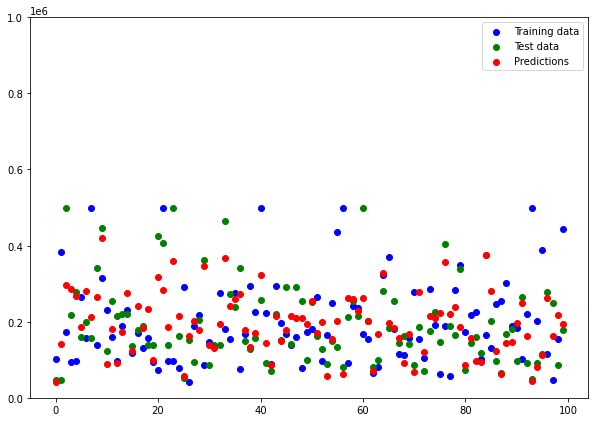

In [52]:
plot_predictions(predictions=lr_preds)

In [53]:
from sklearn.metrics import mean_absolute_error
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mae

49661.22238372093

In [54]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [55]:
tree_preds = tree_reg.predict(X_test)

In [56]:
# Comparing
for i in range(10):
    print(f'Predicted: {tree_preds[i]} - Real: {y_test.iloc[i]}')

Predicted: 42600.0 - Real: 47700.0
Predicted: 69300.0 - Real: 45800.0
Predicted: 466700.0 - Real: 500001.0
Predicted: 235300.0 - Real: 218600.0
Predicted: 315200.0 - Real: 278000.0
Predicted: 110700.0 - Real: 158700.0
Predicted: 195400.0 - Real: 198200.0
Predicted: 158000.0 - Real: 157500.0
Predicted: 285200.0 - Real: 340000.0
Predicted: 500001.0 - Real: 446600.0


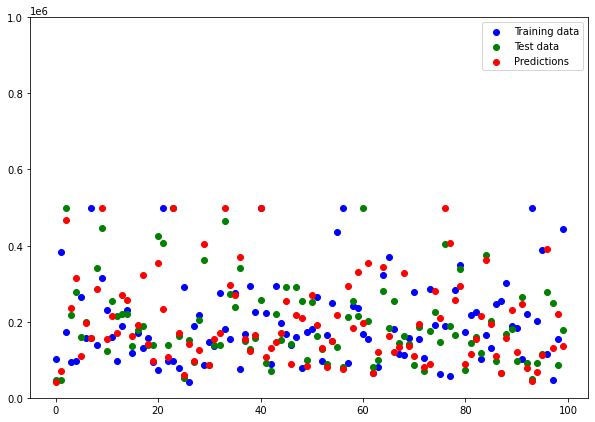

In [57]:
plot_predictions(predictions=tree_preds)

In [58]:
tree_mae = mean_absolute_error(y_test, tree_preds)
tree_mae

44117.97093023256

In [59]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [60]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
forest_preds = forest_reg.predict(X_test)

In [62]:
# Comparing
for i in range(10):
    print(f'Predicted: {forest_preds[i]} - Real: {y_test.iloc[i]}')

Predicted: 50592.0 - Real: 47700.0
Predicted: 68222.0 - Real: 45800.0
Predicted: 472283.51 - Real: 500001.0
Predicted: 254701.0 - Real: 218600.0
Predicted: 238648.02 - Real: 278000.0
Predicted: 169103.0 - Real: 158700.0
Predicted: 234422.03 - Real: 198200.0
Predicted: 167279.0 - Real: 157500.0
Predicted: 230963.01 - Real: 340000.0
Predicted: 464244.58 - Real: 446600.0


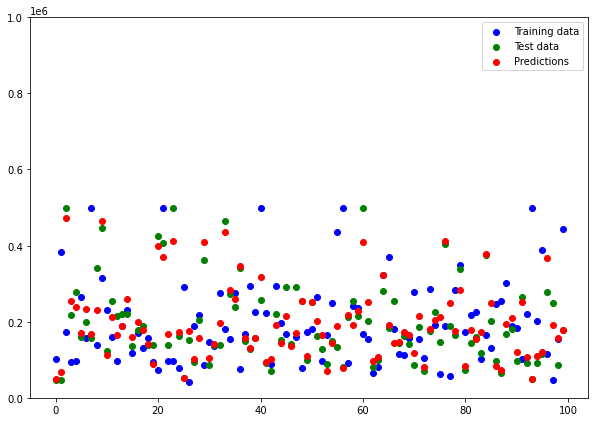

In [63]:
plot_predictions(predictions=forest_preds)

In [64]:
X_train.shape

(16512, 16)

In [65]:
forest_mae = mean_absolute_error(y_test, forest_preds)
forest_mae

32069.77078003876

In [66]:
# Dense Neural network
import tensorflow as tf

nn = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

nn.compile(loss=tf.keras.losses.mae, # mean absolute error
          optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2))

history = nn.fit(X_train, 
       y_train,
      epochs=20)

Epoch 1/20
516/516 [==============================] - 1s 872us/step - loss: 78824.5000
Epoch 2/20
516/516 [==============================] - 0s 940us/step - loss: 51821.4258
Epoch 3/20
516/516 [==============================] - 0s 909us/step - loss: 49560.0352
Epoch 4/20
516/516 [==============================] - 0s 893us/step - loss: 49050.6094
Epoch 5/20
516/516 [==============================] - 0s 808us/step - loss: 48583.2695
Epoch 6/20
516/516 [==============================] - 0s 800us/step - loss: 48441.0234
Epoch 7/20
516/516 [==============================] - 0s 837us/step - loss: 48367.1836
Epoch 8/20
516/516 [==============================] - 0s 825us/step - loss: 48420.0273
Epoch 9/20
516/516 [==============================] - 0s 841us/step - loss: 48223.7891
Epoch 10/20
516/516 [==============================] - 0s 862us/step - loss: 48369.9688
Epoch 11/20
516/516 [==============================] - 0s 851us/step - loss: 48191.9648
Epoch 12/20
516/516 [====================

<AxesSubplot:>

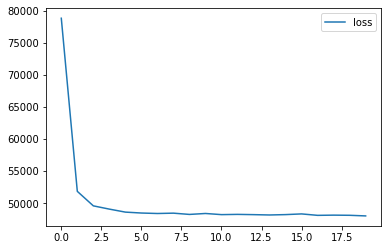

In [67]:
pd.DataFrame(history.history).plot()

In [68]:
nn_preds = nn.predict(X_test)

129/129 [==============================] - 0s 602us/step


In [69]:
# Comparing
for i in range(10):
    print(f'Predicted: {nn_preds[i]} - Real: {y_test.iloc[i]}')

Predicted: [37832.824] - Real: 47700.0
Predicted: [113234.57] - Real: 45800.0
Predicted: [260789.47] - Real: 500001.0
Predicted: [270032.28] - Real: 218600.0
Predicted: [237754.94] - Real: 278000.0
Predicted: [165568.17] - Real: 158700.0
Predicted: [265275.06] - Real: 198200.0
Predicted: [196301.33] - Real: 157500.0
Predicted: [262599.1] - Real: 340000.0
Predicted: [403972.1] - Real: 446600.0


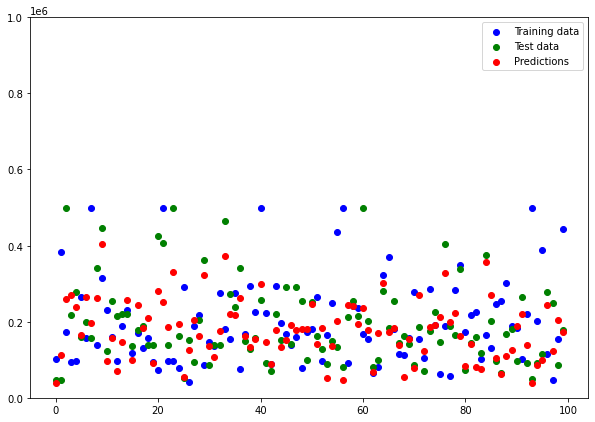

In [70]:
plot_predictions(predictions=nn_preds)

In [71]:
nn_mae = mean_absolute_error(y_test, nn_preds)
nn_mae

49133.53823190142

In [72]:
print(f'Linear Regression MAE: {lr_mae} \nDecision Tree MAE: {tree_mae} \nRandom Forest MAE: {forest_mae} \nNeural Network MAE: {nn_mae}')

Linear Regression MAE: 49661.22238372093 
Decision Tree MAE: 44117.97093023256 
Random Forest MAE: 32069.77078003876 
Neural Network MAE: 49133.53823190142


## Based on the `MAE` metric, the `Random Forest` algorithm works the best for this problem!